In [2]:
import pandas as pd 
data = pd.read_csv('final_processed_data.csv')
df = pd.DataFrame(data)
df.head()

,CLASS,ENGLISH_P,HINDI_P,MATHEMATICS_P,SCIENCE_P,SOCIAL_SCIENCE_P,PERCENTAGE
0,4,9.0,6.2,8.2,8.0,8.6,84.0
1,4,5.4,5.0,7.0,6.8,6.6,54.2
2,4,4.0,5.0,3.8,3.6,3.8,32.8
3,4,5.4,5.2,6.8,3.8,3.8,41.4
4,4,7.8,6.6,7.0,8.2,7.4,62.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CLASS             581 non-null    int64  
 1   ENGLISH_P         581 non-null    float64
 2   HINDI_P           581 non-null    float64
 3   MATHEMATICS_P     581 non-null    float64
 4   SCIENCE_P         581 non-null    float64
 5   SOCIAL_SCIENCE_P  581 non-null    float64
 6   PERCENTAGE        581 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.8 KB


In [5]:
df.describe()

,CLASS,ENGLISH_P,HINDI_P,MATHEMATICS_P,SCIENCE_P,SOCIAL_SCIENCE_P,PERCENTAGE
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,6.679862,7.336317,6.979690,6.954045,6.708778,6.546816,68.067126
std,1.601968,1.949440,1.979289,2.052057,2.158793,2.297873,17.788675
min,4.000000,0.400000,0.600000,0.400000,0.600000,0.400000,14.300000
25%,5.000000,6.200000,5.600000,5.500000,5.100000,5.000000,55.800000
50%,7.000000,7.800000,7.200000,7.200000,6.800000,6.600000,68.700000
75%,8.000000,8.800000,8.600000,8.600000,8.400000,8.500000,83.500000
max,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99.300000


# quick overview of data

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file(output_file = 'data_overview.html')

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# so by seeing the correlation we can say that percentage is highly corelated with subject periodic score

# Now lets perform transformation data point 

# Gausian transformation



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

### Q-Q Plot

In [8]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

Q-Q PLOT of english


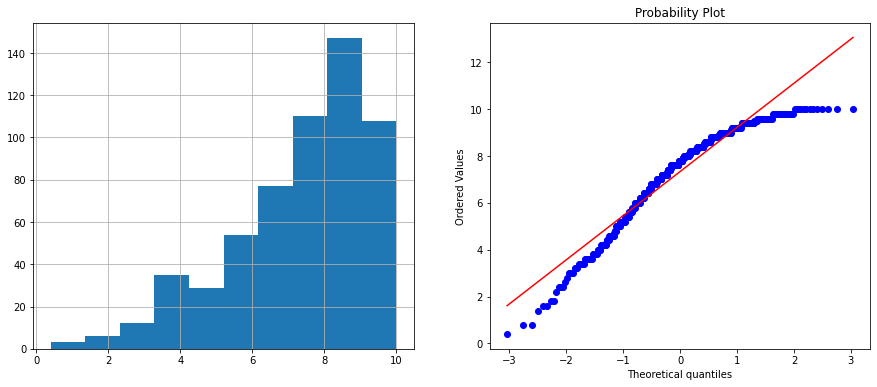

Q-Q PLOT of hindi


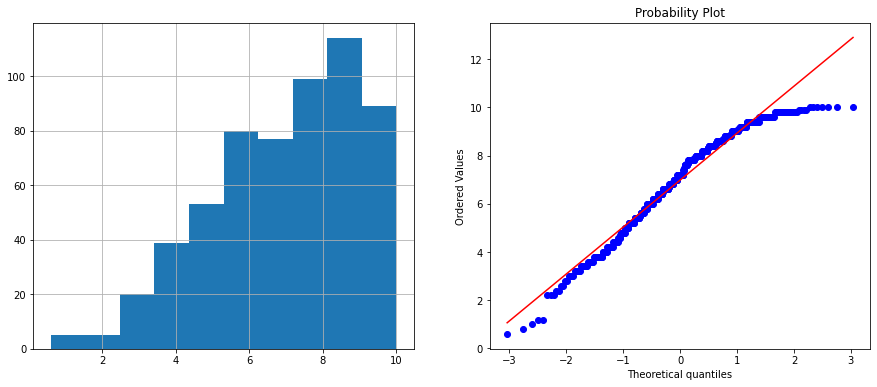

Q-Q PLOT of Maths


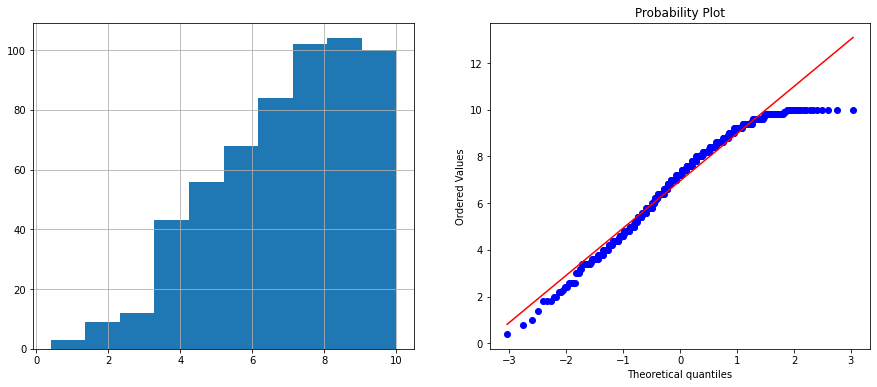

Q-Q PLOT of SCIENCE


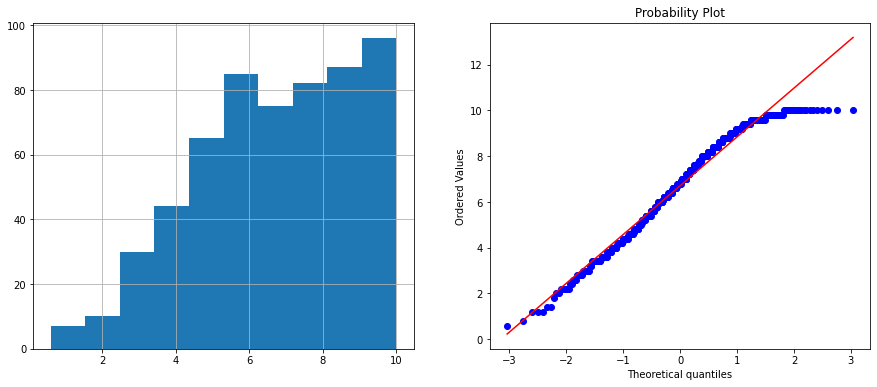

Q-Q PLOT of SST


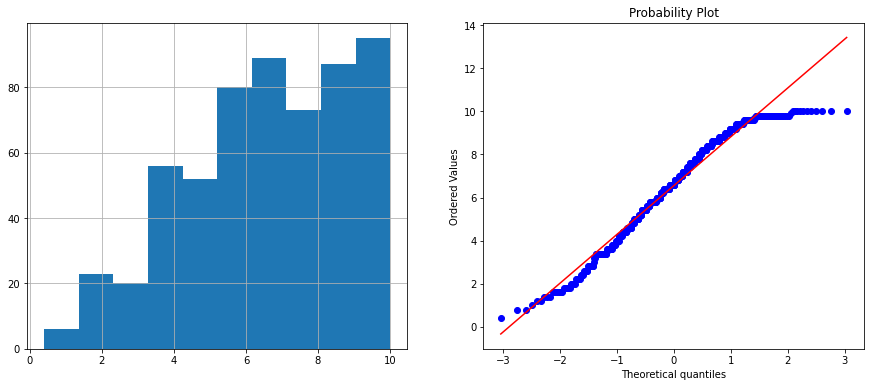

In [9]:
print('Q-Q PLOT of english')
diagnostic_plots(df, 'ENGLISH_P')
print('Q-Q PLOT of hindi')
diagnostic_plots(df, 'HINDI_P')
print('Q-Q PLOT of Maths')
diagnostic_plots(df, 'MATHEMATICS_P')
print('Q-Q PLOT of SCIENCE')
diagnostic_plots(df, 'SCIENCE_P')
print('Q-Q PLOT of SST')
diagnostic_plots(df, 'SOCIAL_SCIENCE_P')


# So we can see that subjects do not have gaussian distribution
## so first we will transform them

#### logarithmic Transformation

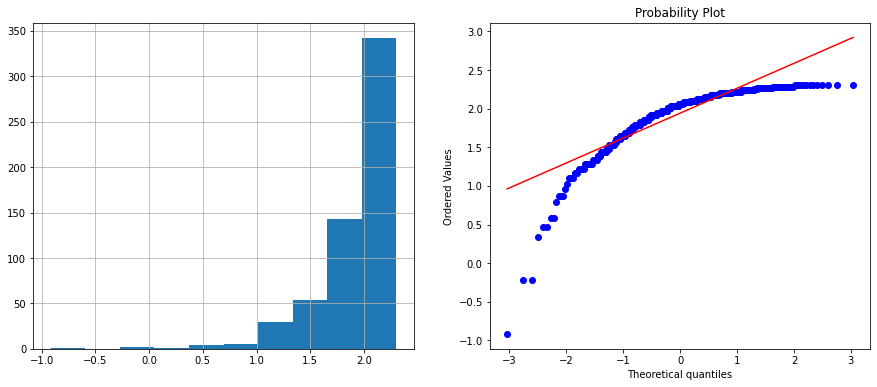

In [10]:
df['Log_eng']=np.log(df['ENGLISH_P'])
diagnostic_plots(df,'Log_eng')

didn't affect the graph

#### Reciprocal transformation

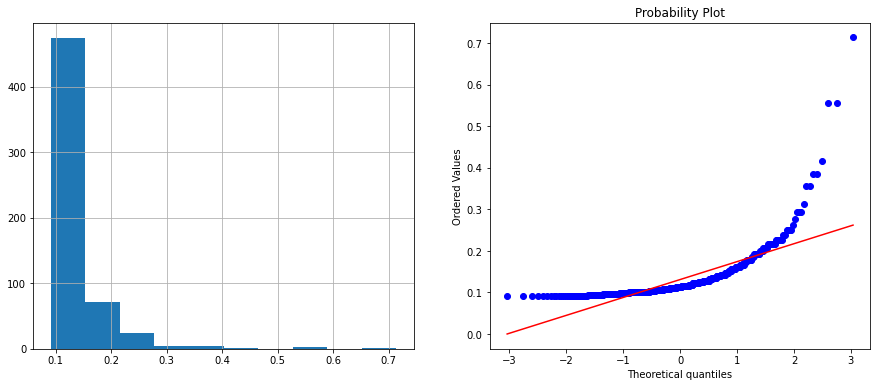

In [11]:
df['Rec_eng']=1/(df['ENGLISH_P']+1)
diagnostic_plots(df,'Rec_eng')

### Sqaure Root Tansformation

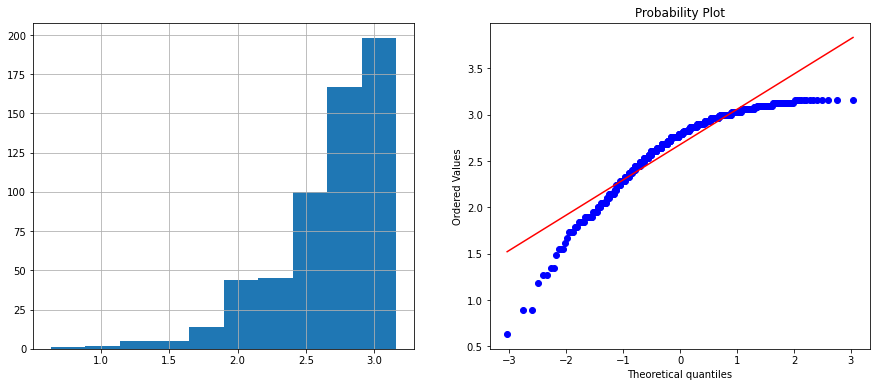

In [12]:
df['sqr_eng']=df['ENGLISH_P']**(1/2)
diagnostic_plots(df,'sqr_eng')

### Exponential Tanformation

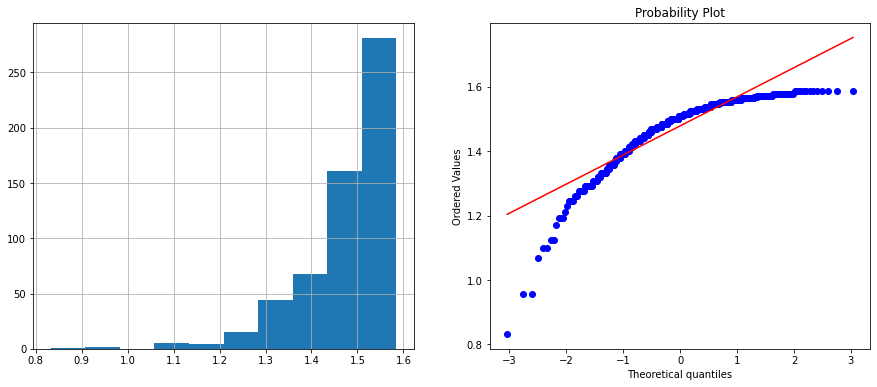

In [13]:
data['Exp_eng']=data['ENGLISH_P']**(1/5)
diagnostic_plots(data,'Exp_eng')

## BoxCox

Optimal lambda:  1.7525290042009027


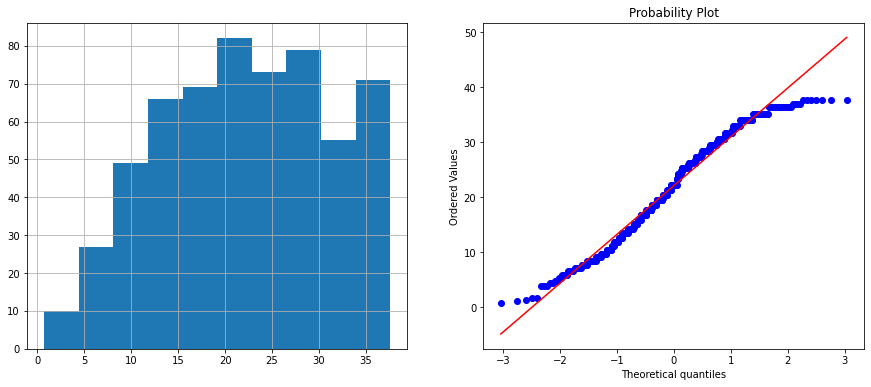

In [14]:
df['eng_boxcox'], param = stats.boxcox(df.HINDI_P+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'eng_boxcox')

### ONLY BOXCOX TRANSFORMATION DID GOOD JOB